# Using core classes

This notebook aims to illustrate the `VertexAtom` and `TrivalentVertex` classes and the computed values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pychemcurv

The `TrivalentVertex` class is a child class of the `VertexAtom` class corresponding to the specific case where there are 3 atoms B belonging to *(A).

In the `VertexAtom` class, only the angular defect is provided because it is defined whatever the size of *(A) (assuming 3 is the minimum).

In the `TrivalentVertex` class several geometrycal parameters are computed.

## Compute data for a range of  pyramids

### Trivalent case

Compute the pyramidalization angle for a series of perfect pyramid of known pyramidalization angle using the `TrivalentVertex` class and the `from_pyramid` function.

In [2]:
l = 1.4
xyz = ""
data = list()
for iline, theta in enumerate(range(90, 90 + 31, 1), 1):
    
    va = pychemcurv.TrivalentVertex.from_pyramid(l, theta)
    
    
    aline = dict(theta=theta)
    aline.update(va.as_dict(radians=False))
    data.append(aline)

    xyz += va.write_file(filename=None)

with open("traj.xyz", "w") as f:
    f.write(xyz)

In [3]:
df = pd.DataFrame(data)
df.head()

,theta,atom_A,star_A,reg_star_A,distances,angles,n_star_A,angular_defect,pyr_distance,pyrA,spherical_curvature,improper
0,90,"[0.0, 0.0, -8.572527594031472e-17]","[[1.4, 0.0, 0.0], [-0.6999999999999996, 1.2124...","[[1.0, 0.0, -2.449293598294706e-17], [-0.49999...","[1.4, 1.4, 1.4]","{(0, 1): 119.99999999999999, (0, 2): 120.00000...",3,0.000000,8.572528e-17,0.0,8.747477e-17,7.016709e-15
1,91,"[0.0, 0.0, 0.02443336901219686]","[[1.3997867732189477, 0.0, 0.0], [-0.699893386...","[[0.9998476951563912, 0.0, 0.00698096257491339...","[1.4000000000000001, 1.4000000000000001, 1.400...","{(0, 1): 119.96977768055153, (0, 2): 119.96977...",3,0.090667,2.443337e-02,1.0,2.493201e-02,-1.999391e+00
2,92,"[0.0, 0.0, 0.04885929538350133]","[[1.399147157826734, 0.0, 0.0], [-0.6995735789...","[[0.9993908270190957, 0.0, 0.01395979868100038...","[1.4000000000000001, 1.4000000000000001, 1.4]","{(0, 1): 119.87920257674472, (0, 2): 119.87920...",3,0.362392,4.885930e-02,2.0,4.985642e-02,-3.995138e+00
3,93,"[0.0, 0.0, 0.07327033874012137]","[[1.3980813486564032, 0.0, 0.0], [-0.699040674...","[[0.9986295347545738, 0.0, 0.02093438249717753...","[1.4, 1.4, 1.3999999999999997]","{(0, 1): 119.72854887306534, (0, 2): 119.72854...",3,0.814353,7.327034e-02,3.0,7.476565e-02,-5.983640e+00
4,94,"[0.0, 0.0, 0.09765906324177548]","[[1.3965896703637537, 0.0, 0.0], [-0.698294835...","[[0.9975640502598243, 0.0, 0.02790258949765012...","[1.3999999999999997, 1.4, 1.3999999999999997]","{(0, 1): 119.51826899468107, (0, 2): 119.51826...",3,1.445193,9.765906e-02,4.0,9.965211e-02,-7.961385e+00


### General case

If there are more thant 3 atoms in *(A) you have to use the `VertexAtom` class.

In [4]:
l = 1.4
xyz = ""
data = list()
for iline, theta in enumerate(range(90, 90 + 31, 1), 1):
    
    va = pychemcurv.VertexAtom.from_pyramid(l, theta, n_star_A=4)
    
    aline = dict(theta=theta)
    aline.update(va.as_dict(radians=False))
    data.append(aline)

    xyz += va.write_file(filename=None)

with open("traj_4B.xyz", "w") as f:
    f.write(xyz)

In [5]:
df = pd.DataFrame(data)
df.head()

,theta,atom_A,star_A,reg_star_A,distances,angles,n_star_A,angular_defect,pyr_distance
0,90,"[0.0, 0.0, -8.572527594031472e-17]","[[1.4, 0.0, 0.0], [8.572527594031472e-17, 1.4,...","[[1.0, 0.0, -2.449293598294706e-17], [6.123233...","[1.4, 1.4, 1.4, 1.4]","{(3, 2): 90.0, (2, 1): 90.0, (1, 0): 90.0, (0,...",4,0.000000,8.572528e-17
1,91,"[0.0, 0.0, 0.02443336901219686]","[[1.3997867732189477, 0.0, 0.0], [8.5712219565...","[[0.9998476951563912, 0.0, 0.00698096257491339...","[1.4000000000000001, 1.4000000000000001, 1.400...","{(3, 2): 89.98254847933055, (2, 1): 89.9825484...",4,0.069806,2.443337e-02
2,92,"[0.0, 0.0, 0.04885929538350133]","[[1.399147157826734, 0.0, 0.0], [8.56730544184...","[[0.9993908270190957, 0.0, 0.01395979868100038...","[1.4000000000000001, 1.4000000000000001, 1.400...","{(3, 2): 89.93021516313709, (2, 1): 89.9302151...",4,0.279139,4.885930e-02
3,93,"[0.0, 0.0, 0.07327033874012137]","[[1.3980813486564032, 0.0, 0.0], [8.5607792428...","[[0.9986295347545738, 0.0, 0.02093438249717753...","[1.4, 1.4, 1.4, 1.4]","{(3, 2): 89.84306366620169, (2, 1): 89.8430636...",4,0.627745,7.327034e-02
4,94,"[0.0, 0.0, 0.09765906324177548]","[[1.3965896703637537, 0.0, 0.0], [8.5516453476...","[[0.9975640502598243, 0.0, 0.02790258949765012...","[1.3999999999999997, 1.3999999999999997, 1.399...","{(3, 2): 89.72119960596119, (2, 1): 89.7211996...",4,1.115202,9.765906e-02


## Compute data for defined pyramid

### A perfect sp3 pyramid

In [6]:
va = pychemcurv.TrivalentVertex.from_pyramid(1.3, np.degrees(np.arccos(-1/3)), perturb=0)
print(va)
va.write_file(filename="mol.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper}")

pyrA: 19.4712 degrees
Atom A:
[0.         0.         0.43333333]
Atoms B in *(A):
[[ 1.22565175  0.          0.        ]
 [-0.61282588  1.06144556  0.        ]
 [-0.61282588 -1.06144556  0.        ]]

pyr angle:    19.4712
pyr distance:     0.4333
angular defect:     0.5513
spherical curvature : 0.5128205128205127
improper angle: -0.6154797086703873


### A perfect sp2 atom

In [7]:
va = pychemcurv.TrivalentVertex.from_pyramid(1.3, 90, perturb=0)
print(va)
va.write_file(filename="mol_sp2.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper:10.4f}")

pyrA: 0.0000 degrees
Atom A:
[ 0.00000000e+00  0.00000000e+00 -7.96020419e-17]
Atoms B in *(A):
[[ 1.3         0.          0.        ]
 [-0.65        1.12583302  0.        ]
 [-0.65       -1.12583302  0.        ]]

pyr angle:     0.0000
pyr distance:     0.0000
angular defect:     0.0000
spherical curvature : 9.420359993441179e-17
improper angle:     0.0000


### A sp3 pyramid with random noize

Compute the same quantities for a sp3 pyramid but randomize the positions.

#### perturb by 1%

In [8]:
va = pychemcurv.TrivalentVertex.from_pyramid(1.3, np.degrees(np.arccos(-1/3)), perturb=0.01 * 2)
print(va)
va.write_file(filename="mol_r.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper:10.4f}")

pyrA: 19.3014 degrees
Atom A:
[0.         0.         0.43333333]
Atoms B in *(A):
[[ 1.25592593  0.00159322  0.01800116]
 [-0.61261264  1.06097457 -0.00330133]
 [-0.61887509 -1.06470345 -0.01480539]]

pyr angle:    19.3014
pyr distance:     0.4334
angular defect:     0.5425
spherical curvature : 0.5041101008620948
improper angle:    -0.6133


#### Perturb by 15%

Compute the same quantities for a sp3 pyramid but randomize the positions by 15%.

In [9]:
va = pychemcurv.TrivalentVertex.from_pyramid(1.4, np.degrees(np.arccos(-1/3)), perturb=0.15 * 2)
print(va)
va.write_file(filename="mol_r.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper:10.4f}")

pyrA: 12.9280 degrees
Atom A:
[0.         0.         0.46666667]
Atoms B in *(A):
[[ 1.38342901  0.02762911  0.05468004]
 [-0.36933268  1.64180071 -0.18420113]
 [-0.39271277 -0.60294111  0.42223143]]

pyr angle:    12.9280
pyr distance:     0.2404
angular defect:     0.2696
spherical curvature : 0.3498395621443218
improper angle:    -0.2235


### Random rotation

Apply a random rotation and translation to the molecule, and check the results do not change.

In [10]:
# transformation matrix from qr decomposition of a random matrix
q ,r = np.linalg.qr(np.random.random((3, 3)))

# random translation vector
translation = np.random.uniform(-10, 10, 3)

# new coordinates
coords = np.vstack((va.a, va.star_a))
qcoords = np.dot(coords, q) + translation
print("qcoords = \n", qcoords)

va = pychemcurv.TrivalentVertex(qcoords[0], qcoords[1:])
va.write_file(filename="random.xyz")
print(f"pyr angle: {va.pyrA:10.4f}")
print(f"pyr distance: {va.pyr_distance:10.4f}")
print(f"angular defect: {va.angular_defect:10.4f}")
print(f"spherical curvature : {va.spherical_curvature}")
print(f"improper angle: {va.improper:10.4f}")

qcoords = 
 [[-1.41209978 -0.5804897  -8.44044036]
 [-1.92385662  0.7193152  -8.80511053]
 [-2.33508286 -1.45495571 -9.72065772]
 [-0.72651273 -0.66998243 -8.23624135]]
pyr angle:    12.9280
pyr distance:     0.2404
angular defect:     0.2696
spherical curvature : 0.34983956214432
improper angle:    -0.2235


## POAV1

The `POAV1` class compute quantities related to the POAV1 theory. POAV stands for Pi Orbital Atomic Vector.

The class is defined from a trivalent vertex.

In [11]:
va = pychemcurv.TrivalentVertex.from_pyramid(1., theta=108)
poav1 = pychemcurv.POAV1(va)

In [12]:
print(f"c_pi^2 = {poav1.c_pi**2:.4f}")
print(f"lambda_pi^2 = {poav1.lambda_pi**2:.4f}")

c_pi^2 = 0.2111
lambda_pi^2 = 0.7889


The POAV1 vector is computed from the coordinates of the atoms.

In [13]:
poav1.poav

array([0., 0., 1.])

All quantities can be exported as a dict.

In [14]:
poav1.as_dict()

{'hybridization': 2.802983248181589,
 'n': 2.802983248181589,
 'm': 0.26766108272719624,
 'c_pi^2': 0.21114561800016823,
 'lambda_pi^2': 0.7888543819998319,
 'poav': [0.0, 0.0, 0.9999999999999998]}

## POAV2

The `POAV2` class compute quantities related to the POAV2 theory. 

The class is defined from a trivalent vertex.

In [15]:
va = pychemcurv.TrivalentVertex.from_pyramid(1., theta=108, perturb=0.1)
poav2 = pychemcurv.POAV2(va)

In [16]:
print(f"pi hybridation number    : {poav2.pi_hyb_nbr:.3f}")
print(f"sigma hybridation numbers: " + " ".join([f"{n:.3f}" for n in poav2.sigma_hyb_nbrs]))

pi hybridation number    : 0.075
sigma hybridation numbers: 0.130 34.014 60.417


In [17]:
{k: np.degrees(v) for k, v in poav2.angles.items()}

{(0, 1): 118.41833289656262,
 (0, 2): 110.9210893511115,
 (1, 2): 91.26401257819487}

The vector $\vec{u}_{\pi}$ of the POAV2 theory vector is computed from the coordinates of the atoms.

In [18]:
poav2.u_pi

array([-0.49757134, -0.12670287,  0.85811954])

All quantities can be exported as a dict.

In [19]:
poav2.as_dict()

{'pi_hyb_nbr': 0.07532924917008321,
 'u_pi': [-0.49757133930577274, -0.12670287175858008, 0.8581195398017625],
 'matrix': [[0.04455538236386827, 0.588884912058546, 0.11278485837945784],
  [-0.2845123429335934, -0.32855432664158124, -0.2134830355675231],
  [0.23995696056972513, -0.2603305854169647, 0.10069817718806526]],
 'n_1': 0.12980903427482438,
 'n_2': 34.01366013285981,
 'n_3': 60.4170565640874}

## Hybridization

Calculations of $c_\pi^2 / 3$ and $\lambda_\pi^2$ as a function of $pyrA$.

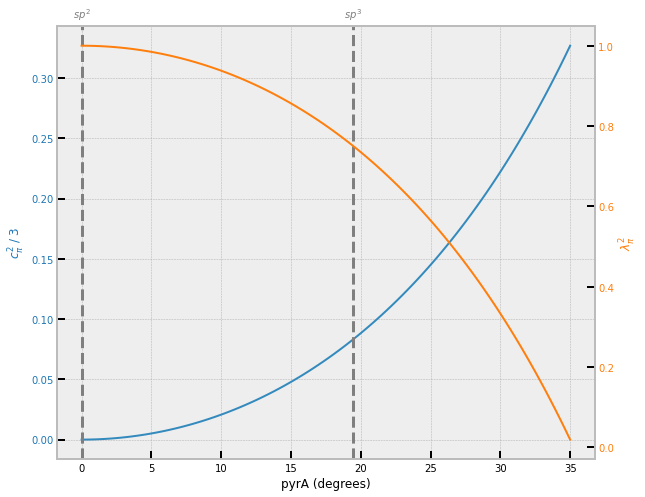

In [24]:
theta_values = np.linspace(90, 125, 100)
pyrA = theta_values - 90
data = {"cpi2": [], "lambdapi2": []}
for theta in theta_values:
    va = pychemcurv.TrivalentVertex.from_pyramid(1., theta)
    poav1 = pychemcurv.POAV1(va)
    data["cpi2"].append(poav1.c_pi ** 2)
    data["lambdapi2"].append(poav1.lambda_pi ** 2)

data["cpi2"] = np.array(data["cpi2"])
data["lambdapi2"] = np.array(data["lambdapi2"])

with plt.style.context("bmh"):
    fig, ax1 = plt.subplots(figsize=(9, 7))
    
    ax1.plot(pyrA, data["cpi2"] / 3, label="$p_z$ weight in $\sigma$ orbitals")
    ax1.set_xlabel('pyrA (degrees)')
    ax1.set_ylabel('$c_\pi^2 \; / \; 3$', color="C0")
    ax1.tick_params(axis='y', labelcolor="C0")

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.plot(pyrA, data["lambdapi2"], color="C1", label="s weight in $\pi$ orbital")
    
    ax2.set_ylabel('$\lambda_\pi^2$', color="C1")
    ax2.tick_params(axis='y', labelcolor="C1")
    
    ax1.axvline(0, color="C7", ls="--", lw=3)
    ax1.axvline(19.4712, color="C7", ls="--", lw=3)
    ax1.text(0, 0.35, "$sp^2$", ha="center", color="C7")
    ax1.text(19.4712, 0.35, "$sp^3$", ha="center", color="C7")

    plt.grid(False)
    fig.tight_layout()
#    plt.savefig("hybrid.png", dpi=300)
    

In [ ]:
latex = df.to_latex(
    index=False,
    escape=False,
    columns=["theta", "pyrA", "c_pi^2", "lambda_pi^2", "m", "n", "hybridization"],
    formatters={"lambda_pi^2": lambda x: "%8.3f" % x,
                "c_pi^2": lambda x: "%8.3f" % x,
                "m": lambda x: "%8.3f" % x,
                "hybridization": lambda x: "%8.3f" % x,
                "n": lambda x: "%8.3f" % x})
print(latex)